## Ejercicios 

1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias
     *   La diferencia de las caras es mayor que 1
     *   La suma de las caras sea par
3. Verifica en cada caso, que
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)  
     Aquí pueden utilizar Python (para los que ya tengan conocimiento previo de matplotlib) o dibujado a mano / tablet /etc
5. Sube tu notebook a GitHub

---

### Se cargan las librerias a utilizar

In [1]:
from itertools import product #para el producto cartesiano
from fractions import Fraction
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

### Se crea el espacio muestral Omega

In [2]:
def P(A, Omega):
    P = Fraction(len(A),len(Omega))
    return P

In [3]:
#Primero vamos a crear a nuestro espacio muestral Omega
L = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(L, repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

----

## Calcular la ley de las siguientes variables aleatorias
## La diferencia de las caras es mayor que 1

In [4]:
# Se crea el set del experimento a realizar
S_mayor_1 = defaultdict(set)

In [5]:
S_mayor_1 = {(i,j): i-j for i,j in Omega if i-j > 1}

In [6]:
# Elementos de Omega que cumplen con la condicion
S_mayor_1

{(3, 1): 2,
 (5, 1): 4,
 (6, 2): 4,
 (4, 2): 2,
 (5, 3): 2,
 (6, 1): 5,
 (6, 4): 2,
 (4, 1): 3,
 (5, 2): 3,
 (6, 3): 3}

In [7]:
#Vamos a crear un diccionario por default de manera sintetica y arreglada
dS_mayor_1 = defaultdict(set) #lista
dS_mayor_1

defaultdict(set, {})

In [8]:
for i,j in S_mayor_1.items():
    dS_mayor_1[j].add(i) #añadiendo al diccionario las llaves
dS_mayor_1

defaultdict(set,
            {2: {(3, 1), (4, 2), (5, 3), (6, 4)},
             4: {(5, 1), (6, 2)},
             5: {(6, 1)},
             3: {(4, 1), (5, 2), (6, 3)}})

In [9]:
leyS_mayor_1 = defaultdict(set)

In [10]:
leyS_mayor_1 = {k : P(A,S_mayor_1) for k,A in dS_mayor_1.items() }

In [11]:
# Se imprimen la probabilidad del experimeneto
for i in leyS_mayor_1:
    print(leyS_mayor_1[i],', si k =',i)

2/5 , si k = 2
1/5 , si k = 4
1/10 , si k = 5
3/10 , si k = 3


---

Verifica que:
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$

In [12]:
# Se verifica que la suma es 1
(2/5)+(1/5)+(1/10)+(3/10)

1.0

In [13]:
# Se verifica que la suma es 1
y_ley_lista = []
x_ley_lista = []
suma = 0
for i in leyS_mayor_1:
    suma = suma + float(leyS_mayor_1[i])
    y_ley_lista.append(float(leyS_mayor_1[i]))
    x_ley_lista.append(i)
print(suma)

1.0


---

### Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)

In [14]:
y_ley_lista

[0.4, 0.2, 0.1, 0.3]

In [15]:
x_ley_lista

[2, 4, 5, 3]

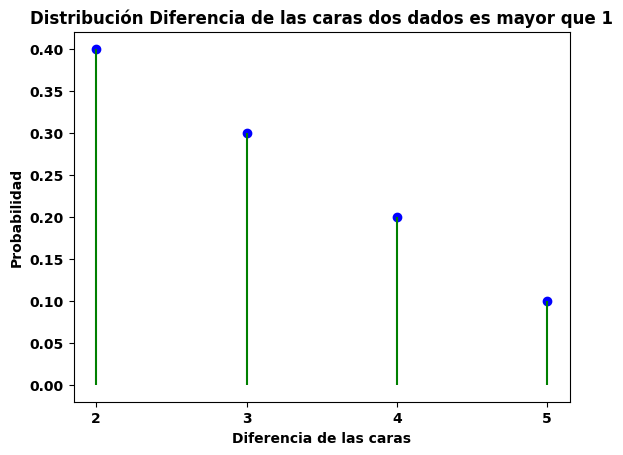

In [16]:
# Grafiar distribución
y = y_ley_lista
x = x_ley_lista
plt.plot(x,y,"bo")
plt.vlines(x,0,y,"g")
plt.title("Distribución Diferencia de las caras dos dados es mayor que 1")
plt.ylabel("Probabilidad")
plt.xlabel("Diferencia de las caras")
plt.xticks(range(2, 6, 1))
plt.show()

---

In [17]:
df = pd.DataFrame(y_ley_lista,x_ley_lista)
df = df.reset_index()
df = df.set_axis(['Diferencia', 'Probabilidad'], axis=1)
df.sort_values('Diferencia', inplace=True)
df

,Diferencia,Probabilidad
0,2,0.4
3,3,0.3
1,4,0.2
2,5,0.1


In [18]:
# Calculamos la CDF
cdf = np.cumsum(df.Probabilidad)

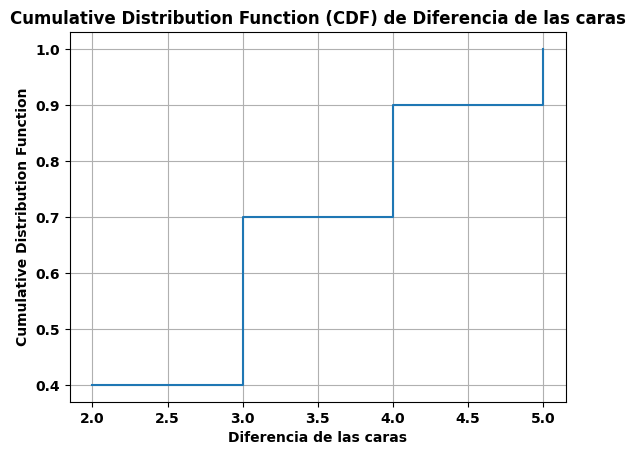

In [19]:
# Plot the CDF
plt.step(df.Diferencia, cdf, where='post')
plt.xlabel('Diferencia de las caras')
plt.ylabel('Cumulative Distribution Function')
plt.title('Cumulative Distribution Function (CDF) de Diferencia de las caras')
plt.grid(True)
plt.show()

----

## La suma de las caras sea par

In [20]:
S_par = defaultdict(set)

In [21]:
S_par = {(i,j): i+j for i,j in Omega if (i+j) % 2 ==0}

In [22]:
S_par

{(3, 1): 4,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 3): 4,
 (6, 2): 8,
 (4, 2): 6,
 (3, 3): 6,
 (5, 3): 8,
 (2, 4): 6,
 (1, 5): 6,
 (6, 4): 10,
 (3, 5): 8,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (2, 6): 8,
 (6, 6): 12}

In [23]:
#Vamos a crear un diccionario por default de manera sintetica y arreglada
dS_par = defaultdict(set) #lista
dS_par

defaultdict(set, {})

In [24]:
for i,j in S_par.items():
    dS_par[j].add(i) #añadiendo al diccionario las llaves
dS_par

defaultdict(set,
            {4: {(1, 3), (2, 2), (3, 1)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [25]:
leyS_par = defaultdict(set)

In [26]:
leyS_par = {k : P(A,S_par) for k,A in dS_par.items() }

In [27]:
for i in leyS_par:
    print(leyS_par[i],', si k =',i)

1/6 , si k = 4
1/6 , si k = 10
5/18 , si k = 6
5/18 , si k = 8
1/18 , si k = 2
1/18 , si k = 12


---

Verifica que:
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$

In [28]:
1/6 + 1/6 + 5/18 + 5/18 + 1/18 + 1/18

1.0

In [29]:
# Se verifica que la suma es 1
y_ley_lista = []
x_ley_lista = []
suma = 0
for i in leyS_par:
    suma = suma + float(leyS_par[i])
    y_ley_lista.append(float(leyS_par[i]))
    x_ley_lista.append(i)
print(suma)

1.0


----

### Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)¶

In [30]:
y_ley_lista

[0.16666666666666666,
 0.16666666666666666,
 0.2777777777777778,
 0.2777777777777778,
 0.05555555555555555,
 0.05555555555555555]

In [31]:
x_ley_lista

[4, 10, 6, 8, 2, 12]

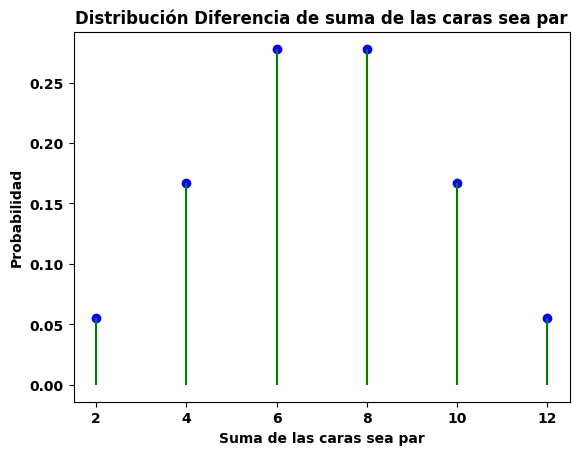

In [32]:
# Grafiar distribución
y = y_ley_lista
x = x_ley_lista
plt.plot(x,y,"bo")
plt.vlines(x,0,y,"g")
plt.title("Distribución Diferencia de suma de las caras sea par")
plt.ylabel("Probabilidad")
plt.xlabel("Suma de las caras sea par")
plt.xticks([4, 10, 6, 8, 2, 12])
plt.show()

---

In [33]:
df = pd.DataFrame(y_ley_lista,x_ley_lista)
df = df.reset_index()
df = df.set_axis(['Suma', 'Probabilidad'], axis=1)
df.sort_values('Suma', inplace=True)
df

,Suma,Probabilidad
4,2,0.055556
0,4,0.166667
2,6,0.277778
3,8,0.277778
1,10,0.166667
5,12,0.055556


In [34]:
# Calculamos la CDF
cdf = np.cumsum(df.Probabilidad)

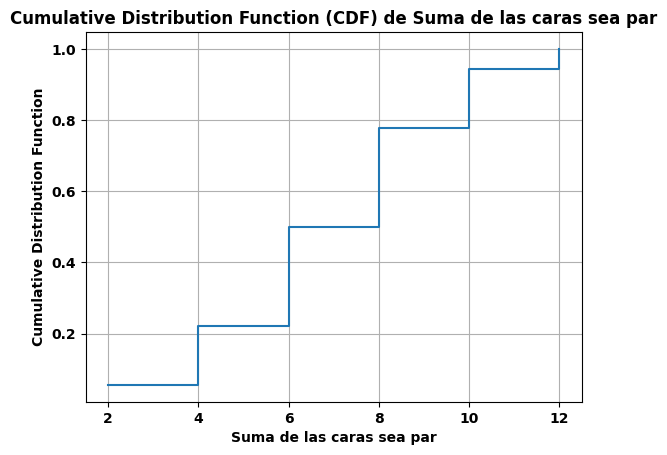

In [35]:
# Plot the CDF
plt.step(df.Suma, cdf, where='post')
plt.xlabel('Suma de las caras sea par')
plt.ylabel('Cumulative Distribution Function')
plt.title('Cumulative Distribution Function (CDF) de Suma de las caras sea par')
plt.grid(True)
plt.show()